In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import imageio

In [2]:
main_dir = '/ocean/projects/asc170022p/singla/Explanation_XRay'
data_dir = 'output/classifier/StanfordCheXpert_256_ICLR/explainer_MIMIC'
result_dir = '/ocean/projects/asc170022p/singla/Explanation_XRay/output/classifier/StanfordCheXpert_256_ICLR/explainer_MIMIC/results_journal'

In [3]:
attribute = [ 'Cardiomegaly', 'Pleural Effusion', 'Edema']
gan_exp = ['Cardiomegaly_Ordinal_KL_UNET/Run_v2/test', \
           'PE_Ordinal_KL_UNET/Run_v2/test', \
           'Edema_Ordinal_KL_UNET/Run_v1/test']
start = [['', '_c_only','SD'], \
        ['', '_pleural_fluid', 'SD'], \
         ['', '_chf',  '_c_and_E', '_edema_opacity']]
main_index = [3, 1,2]
num_channel = 1
num_cls = [14, 14,14,14]
n=3
n_bins = 10
dim = 256

In [4]:
n=2

# Read Numpy Arrays

In [5]:
input_img = []
input_pred = []
fake_img = []
fake_pred = []
names = []
fake_images_A_to_B = []
fake_images_B_to_A = []
fake_images_A_to_B_pred = []
fake_images_B_to_A_pred = []
prefix = ''
for i in range(1,2):
    for j in range(len(start[i])):
        i_img = np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'real_img'+str(start[i][j])+'.npy'))
        i_pred = np.load(os.path.join(main_dir, data_dir, gan_exp[i],prefix+ 'real_pred'+str(start[i][j])+'.npy'))
        f_img = np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'fake_images'+str(start[i][j])+'.npy'))
        f_pred = np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'fake_pred'+str(start[i][j])+'.npy'))                
        a_b = np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'fake_images_A_to_B'+str(start[i][j])+'.npy'))                
        b_a =np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'fake_images_B_to_A'+str(start[i][j])+'.npy'))                
        a_b_p = np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'fake_images_A_to_B_pred'+str(start[i][j])+'.npy'))                
        b_a_p = np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'fake_images_B_to_A_pred'+str(start[i][j])+'.npy'))                
        
        #c_name = np.load(os.path.join(main_dir, data_dir, gan_exp[i], prefix+'names'+str(start[i][j])+'.npy'))
        if j == 0:
            i_img_all = i_img
            f_img_all = f_img
            i_pred_all = i_pred
            f_pred_all = f_pred 
            #names_all = c_name
            a_b_all = a_b
            b_a_all = b_a
            a_b_p_all = a_b_p
            b_a_p_all = b_a_p
        else:
            i_img_all = np.append(i_img_all,i_img,axis=0)
            f_img_all = np.append(f_img_all,f_img,axis=0)
            i_pred_all = np.append(i_pred_all,i_pred,axis=0)
            f_pred_all = np.append(f_pred_all,f_pred,axis=0)
            #names_all = np.append(names_all,c_name,axis=0)
            a_b_all = np.append(a_b_all, a_b,axis=0)
            b_a_all = np.append(b_a_all, b_a,axis=0)
            a_b_p_all = np.append(a_b_p_all, a_b_p,axis=0)
            b_a_p_all = np.append(b_a_p_all, b_a_p,axis=0)
    print(attribute[i], i_img_all.shape)
    print(attribute[i], f_img_all.shape)
    print(attribute[i], i_pred_all.shape)
    print(attribute[i], f_pred_all.shape)
    print(attribute[i], a_b_all.shape)
    print(attribute[i], b_a_all.shape)
    print(attribute[i], a_b_p_all.shape)
    print(attribute[i], b_a_p_all.shape)
    #print(attribute[i], names_all.shape)
    input_img.append(i_img_all)
    fake_img.append(f_img_all)
    input_pred.append(i_pred_all)
    fake_pred.append(f_pred_all)
    fake_images_A_to_B.append(a_b_all)
    fake_images_B_to_A.append(b_a_all)
    fake_images_A_to_B_pred.append(a_b_p_all)
    fake_images_B_to_A_pred.append(b_a_p_all)
    #names.append(names_all)

('Pleural Effusion', (1300, 256, 256, 1))
('Pleural Effusion', (13000, 256, 256, 1))
('Pleural Effusion', (13000, 14))
('Pleural Effusion', (13000, 14))
('Pleural Effusion', (1300, 256, 256, 1))
('Pleural Effusion', (1300, 256, 256, 1))
('Pleural Effusion', (1300, 14))
('Pleural Effusion', (1300, 14))


In [6]:
n = 1

In [7]:
a_input_img = []
a_fake_img = []
fake_images_cycleGAN = []
for i in range(n):
    fake_img1 = np.reshape(fake_img[i], [-1,n_bins,dim,dim,num_channel])
    fake_img1 = np.reshape(fake_img1, [-1,n_bins,dim,dim])
    a_fake_img.append(fake_img1)
    input_img1 =  np.reshape(input_img[i], [-1,dim,dim])
    a_input_img.append(input_img1)   
    fake_images_cycleGAN_ = np.zeros(fake_img1.shape)
    fake_images_cycleGAN_[:,0,:,:] = fake_images_B_to_A[i][:,:,:,0]
    fake_images_cycleGAN_[:,9,:,:] = fake_images_A_to_B[i][:,:,:,0]
    print(input_img1.shape, fake_img1.shape,fake_images_cycleGAN_.shape)
    fake_images_cycleGAN.append(fake_images_cycleGAN_)

((1300, 256, 256), (1300, 10, 256, 256), (1300, 10, 256, 256))


In [8]:
fake_images_cycleGAN_pred = []
for i in range(n):
    input_pred[i] = np.reshape(input_pred[i], [-1,n_bins,num_cls[i]])
    input_pred[i] = np.mean(input_pred[i], axis=1)
    fake_pred[i] = np.reshape(fake_pred[i], [-1,n_bins,num_cls[i]])    
    fake_images_cycleGAN_pred_ = np.zeros(fake_pred[i].shape)
    fake_images_cycleGAN_pred_[:,0,:] = fake_images_B_to_A_pred[i]
    fake_images_cycleGAN_pred_[:,9,:] = fake_images_A_to_B_pred[i]
    fake_images_cycleGAN_pred.append(fake_images_cycleGAN_pred_)
    print(input_pred[i].shape, fake_pred[i].shape,fake_images_cycleGAN_pred[i].shape)

((1300, 14), (1300, 10, 14), (1300, 10, 14))


# Plot a few

ICLR-Cardiomegaly


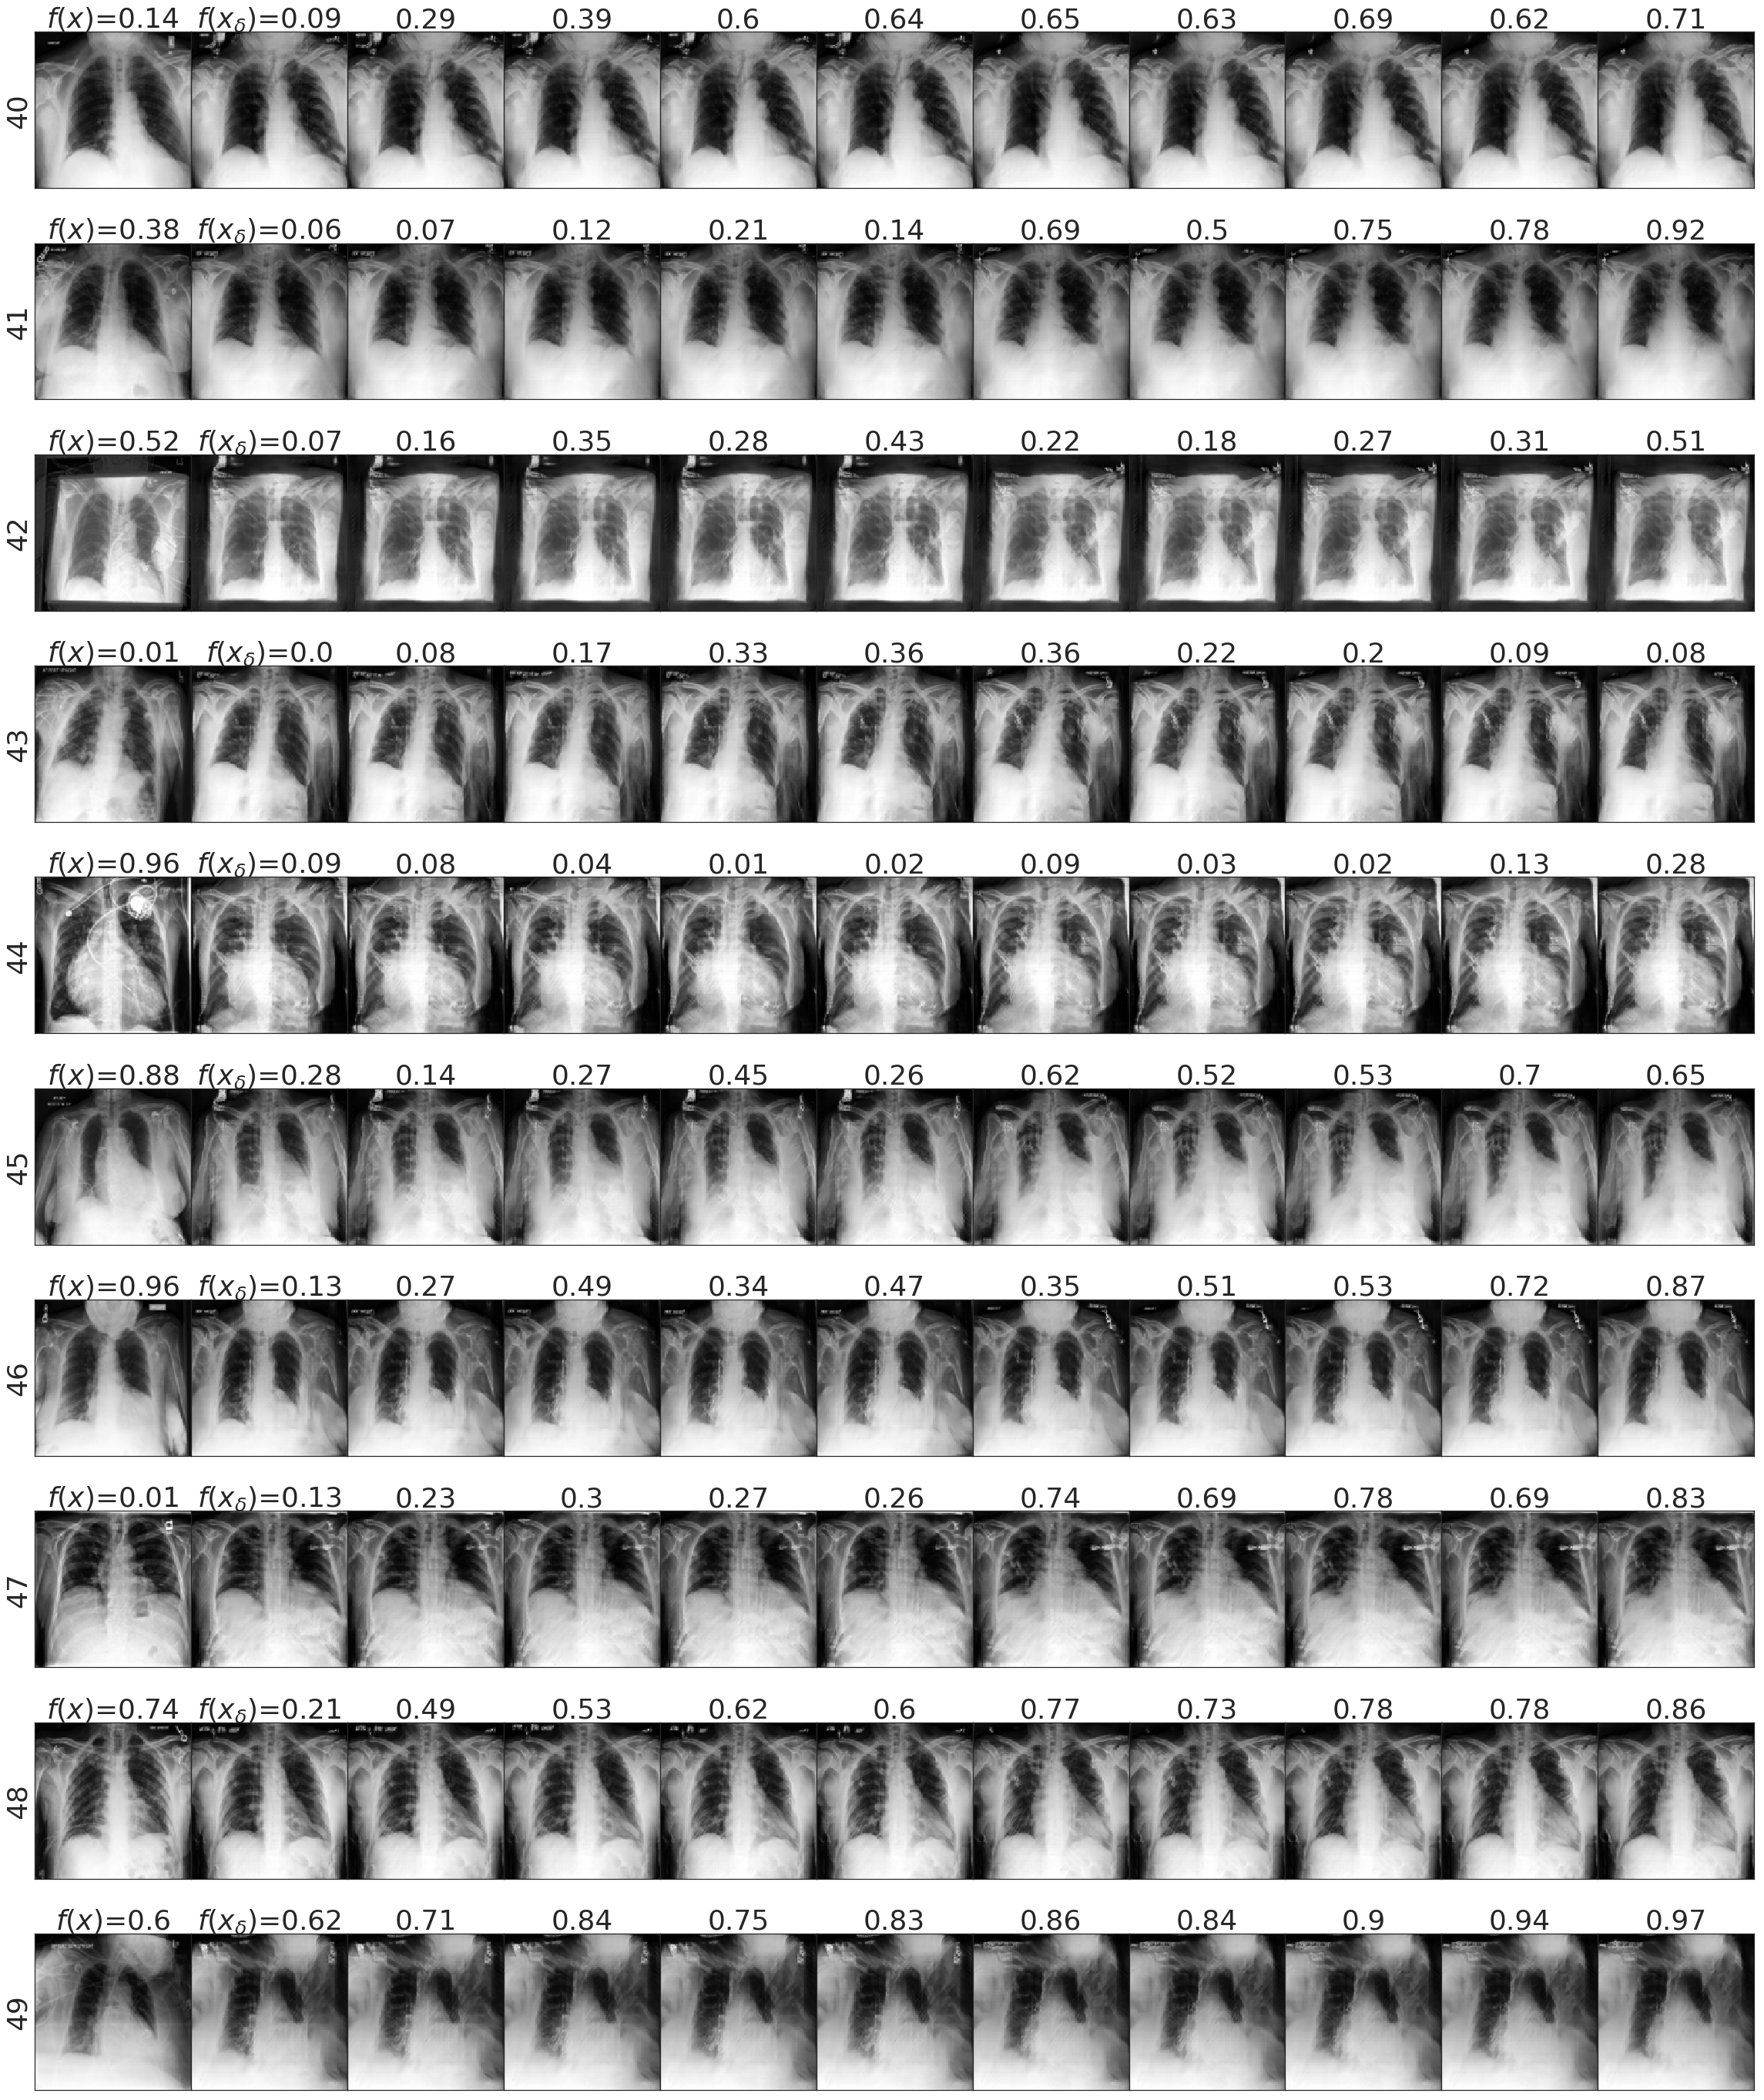

In [10]:
sns.set(style="white")
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2})

samples = [range(40,50),range(5),range(5),range(5)]
for i in range(n):
    print(attribute[i])
    fig = plt.figure(figsize = (40,50))
    counter = 0
    for index in samples[i]:
        #print(names[i][index])
        counter+=1
        plt.subplot(10,11,counter)
        plt.imshow(a_input_img[i][index], cmap ='gray')
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(index)
        plt.title('$f(x)$=' + str(np.round(input_pred[i][index][main_index[i]],decimals=2)))
        for j in range(n_bins):
            counter+=1
            plt.subplot(10,11,counter)
            plt.imshow(a_fake_img[i][index][j],cmap='gray')
            if j == 0:
                value = np.round(fake_pred[i][index][j][main_index[i]],decimals=2)
                plt.title(r'$f(x_{\delta})$='+str(value))
            else:
                plt.title(np.round(fake_pred[i][index][j][main_index[i]],decimals=2))
            plt.xticks([])
            plt.yticks([])
    plt.subplots_adjust(wspace=0, hspace=0.1)
    plt.show()

# Test: Generated images are fooling the classifier

## Origin

In [9]:
all_bins = []
for i in range(n):
    print(input_pred[i].shape, fake_pred[i].shape)
    bins =  np.asarray(input_pred[i][:,main_index[1]]*n_bins).astype(int)
    print(bins.shape)
    print(np.unique(bins,return_counts=True))
    print(np.min(np.unique(bins,return_counts=True)[1]))
    all_bins.append(bins)
    fake_pred[i] = np.reshape(fake_pred[i], [-1,num_cls[i]])
    print(input_pred[i].shape, fake_pred[i].shape)

((1300, 14), (1300, 10, 14))
(1300,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([154, 142,  93,  82,  59,  84,  95, 131, 186, 274]))
59
((1300, 14), (13000, 14))


In [10]:
all_target_bins = []
all_source_bins = []
all_target_pred = []
all_source_pred = []
all_delta = []
for i in range(n):
    target_bin = np.tile(np.asarray(range(n_bins)),all_bins[i].shape[0])
    source_bin = np.repeat(all_bins[i], repeats=n_bins)
    source_pred = np.repeat(input_pred[i][:,main_index[1]], repeats=n_bins)
    target_pred = fake_pred[i][:,main_index[1]]
    delta = target_bin-source_bin
    print(target_bin.shape, source_bin.shape, source_pred.shape,target_pred.shape,delta.shape)
    print(np.min(delta), np.max(delta))
    all_target_bins.append(target_bin)
    all_source_bins.append(source_bin)
    all_target_pred.append(target_pred)
    all_source_pred.append(source_pred)
    all_delta.append(delta)

((13000,), (13000,), (13000,), (13000,), (13000,))
(-9, 9)


/ocean/projects/asc170022p/singla/anaconda/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))


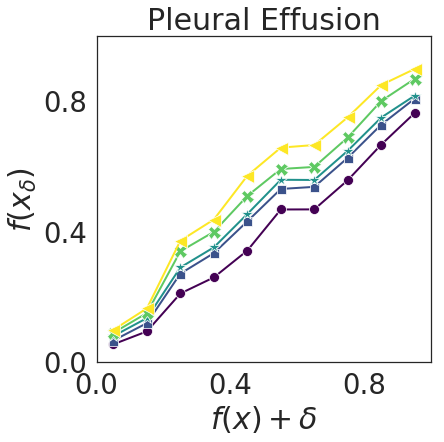

In [11]:
titles = attribute

for iii in range(n):
    real_p = all_target_bins[iii] * 0.1
    real_p_ = (all_target_bins[iii]+1) * 0.1
    real_p = (real_p + real_p_)/2
    fake_q = all_target_pred[iii]
    
    from matplotlib import cm
    colors = cm.get_cmap('viridis', 5)
    newcolors = colors(np.linspace(0, 1, 5))
    #newcmp = ListedColormap(newcolors)
    import seaborn as sns
    sns.set(style="white")
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2})
    fig = plt.figure(figsize = (6,6))
    names = ['0.0-0.2', '', '0.2-0.4', '0.30-0.40', '0.4-0.6', '0.50-0.60', \
             '0.6-0.8', '0.70-0.80', '0.8-1.0', '0.90-1.00']
    makrker_size = [10,0,9,0,13,0,13,0,13,0]
    markers = ['o', '','s','','*', '','X', 'X', '<', '>', 's', '*', 'D', 'd', 'X']
    x = np.arange(0.0, 1.0, step=0.1)
    #plt.plot(x, x,c='black',linestyle='dashed',alpha=0.5) # dashdot black
    for i in range(0,n_bins,2):
        index = np.where(all_source_bins[iii] == i)
        target_pred_i = fake_q[index]
        source_pred_i = real_p[index]
        index = np.where(all_source_bins[iii] == i+1)
        target_pred_i = np.append(target_pred_i, fake_q[index],axis=0)
        source_pred_i = np.append(source_pred_i,real_p[index],axis=0)
        target_pred_i = np.reshape(target_pred_i,[-1,n_bins])
        source_pred_i = np.reshape(source_pred_i,[-1,n_bins])
        
        
        mean_t = np.mean(target_pred_i,0)
        sd_t = np.std(target_pred_i,0)           
        mean_s = np.mean(source_pred_i,0)
        sd_s = np.std(source_pred_i,0)
        x_axis = np.arange(0.0, 1.0, step=0.1)
        #ax = sns.lineplot(mean_s, mean_t, markers=True, dashes=True)
        ax = sns.lineplot(mean_s,mean_t,label=names[i],c=newcolors[int(i/2)],\
                              alpha=1,marker=markers[i], markersize=makrker_size[i])
    plt.xticks(np.arange(0, 1.1, step=0.2))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    ax.get_legend().remove()
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    #plt.legend(loc=2)
    plt.xlabel( r'$f(x)+\delta$' )
    plt.ylabel(r'$f(x_{\delta})$')
    plt.title(titles[1])
    #fig.colorbar(im, ax=axs)
    plt.show()
    #fig.savefig(result_dir + "/"+attribute[iii]+ "_qualitative_no_ledgend.png",\
    #                bbox_inches='tight')

In [12]:
result_dir

'/ocean/projects/asc170022p/singla/Explanation_XRay/output/classifier/StanfordCheXpert_256_ICLR/explainer_MIMIC/results_journal'

## Cycle GAN

In [13]:
all_bins = []
for i in range(n):
    print(input_pred[i].shape, fake_images_cycleGAN_pred[i].shape)
    bins =  np.asarray(input_pred[i][:,main_index[1]]*n_bins).astype(int)
    print(bins.shape)
    print(np.unique(bins,return_counts=True))
    print(np.min(np.unique(bins,return_counts=True)[1]))
    all_bins.append(bins)
    fake_images_cycleGAN_pred[i] = np.reshape(fake_images_cycleGAN_pred[i], [-1,num_cls[i]])
    print(input_pred[i].shape, fake_images_cycleGAN_pred[i].shape)

((1300, 14), (1300, 10, 14))
(1300,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([154, 142,  93,  82,  59,  84,  95, 131, 186, 274]))
59
((1300, 14), (13000, 14))


In [14]:
all_target_bins = []
all_source_bins = []
all_target_pred = []
all_source_pred = []
all_delta = []
for i in range(n):
    target_bin = np.tile(np.asarray(range(n_bins)),all_bins[i].shape[0])
    source_bin = np.repeat(all_bins[i], repeats=n_bins)
    source_pred = np.repeat(input_pred[i][:,main_index[1]], repeats=n_bins)
    target_pred = fake_images_cycleGAN_pred[i][:,main_index[1]]
    delta = target_bin-source_bin
    print(target_bin.shape, source_bin.shape, source_pred.shape,target_pred.shape,delta.shape)
    print(np.min(delta), np.max(delta))
    all_target_bins.append(target_bin)
    all_source_bins.append(source_bin)
    all_target_pred.append(target_pred)
    all_source_pred.append(source_pred)
    all_delta.append(delta)

((13000,), (13000,), (13000,), (13000,), (13000,))
(-9, 9)


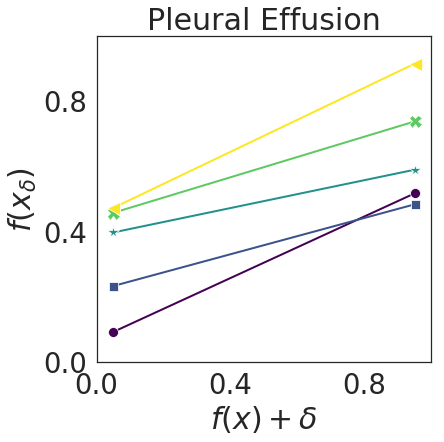

In [15]:
titles = attribute

for iii in range(n):
    real_p = all_target_bins[iii] * 0.1
    real_p_ = (all_target_bins[iii]+1) * 0.1
    real_p = (real_p + real_p_)/2
    fake_q = all_target_pred[iii]
    
    from matplotlib import cm
    colors = cm.get_cmap('viridis', 5)
    newcolors = colors(np.linspace(0, 1, 5))
    #newcmp = ListedColormap(newcolors)
    import seaborn as sns
    sns.set(style="white")
    sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2})
    fig = plt.figure(figsize = (6,6))
    names = ['0.0-0.2', '', '0.2-0.4', '0.30-0.40', '0.4-0.6', '0.50-0.60', \
             '0.6-0.8', '0.70-0.80', '0.8-1.0', '0.90-1.00']
    makrker_size = [10,0,9,0,13,0,13,0,13,0]
    markers = ['o', '','s','','*', '','X', 'X', '<', '>', 's', '*', 'D', 'd', 'X']
    x = np.arange(0.0, 1.0, step=0.1)
    #plt.plot(x, x,c='black',linestyle='dashed',alpha=0.5) # dashdot black
    for i in range(0,n_bins,2):
        index = np.where(all_source_bins[iii] == i)
        target_pred_i = fake_q[index]
        source_pred_i = real_p[index]
        index = np.where(all_source_bins[iii] == i+1)
        target_pred_i = np.append(target_pred_i, fake_q[index],axis=0)
        source_pred_i = np.append(source_pred_i,real_p[index],axis=0)
        target_pred_i = np.reshape(target_pred_i,[-1,n_bins])
        source_pred_i = np.reshape(source_pred_i,[-1,n_bins])
        
        
        mean_t = np.mean(target_pred_i,0)
        sd_t = np.std(target_pred_i,0)           
        mean_s = np.mean(source_pred_i,0)
        sd_s = np.std(source_pred_i,0)
        x_axis = np.arange(0.0, 1.0, step=0.1)
        #ax = sns.lineplot(mean_s, mean_t, markers=True, dashes=True)
        mean_s = mean_s[mean_t!=0]
        mean_t = mean_t[mean_t!=0]
        ax = sns.lineplot(mean_s,mean_t,label=names[i],c=newcolors[int(i/2)],\
                              alpha=1,marker=markers[i], markersize=makrker_size[i])
    plt.xticks(np.arange(0, 1.1, step=0.2))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    ax.get_legend().remove()
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    #plt.legend(loc=2)
    plt.xlabel( r'$f(x)+\delta$' )
    plt.ylabel(r'$f(x_{\delta})$')
    plt.title(titles[1])
    #fig.colorbar(im, ax=axs)
    plt.show()
    #fig.savefig(result_dir + "/"+attribute[iii]+ "_qualitative_no_ledgend_CYCLE_GAN.png",\
    #                bbox_inches='tight')

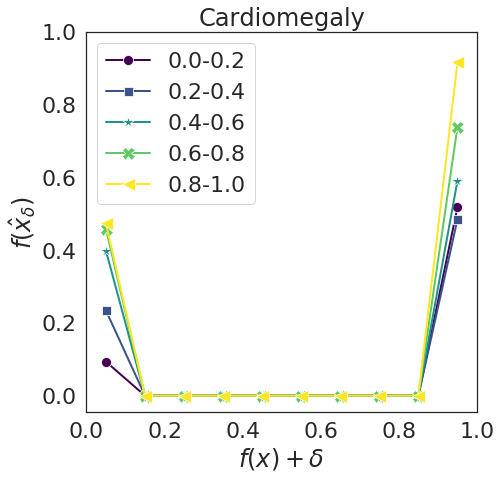

In [16]:
titles = attribute
for iii in range(n):
    real_p = all_target_bins[iii] * 0.1
    real_p_ = (all_target_bins[iii]+1) * 0.1
    real_p = (real_p + real_p_)/2
    fake_q = all_target_pred[iii]
    
    from matplotlib import cm
    colors = cm.get_cmap('viridis', 5)
    newcolors = colors(np.linspace(0, 1, 5))
    #newcmp = ListedColormap(newcolors)
    import seaborn as sns
    sns.set(style="white")
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2})
    fig = plt.figure(figsize = (7,7))
    names = ['0.0-0.2', '', '0.2-0.4', '0.30-0.40', '0.4-0.6', '0.50-0.60', \
             '0.6-0.8', '0.70-0.80', '0.8-1.0', '0.90-1.00']
    makrker_size = [10,0,9,0,13,0,13,0,13,0]
    markers = ['o', '','s','','*', '','X', 'X', '<', '>', 's', '*', 'D', 'd', 'X']
    x = np.arange(0.0, 1.0, step=0.1)
    #plt.plot(x, x,c='black',linestyle='dashed',alpha=0.5) # dashdot black
    for i in range(0,n_bins,2):
        index = np.where(all_source_bins[iii] == i)
        target_pred_i = fake_q[index]
        source_pred_i = real_p[index]
        index = np.where(all_source_bins[iii] == i+1)
        target_pred_i = np.append(target_pred_i, fake_q[index],axis=0)
        source_pred_i = np.append(source_pred_i,real_p[index],axis=0)
        target_pred_i = np.reshape(target_pred_i,[-1,n_bins])
        source_pred_i = np.reshape(source_pred_i,[-1,n_bins])
        
        
        mean_t = np.mean(target_pred_i,0)
        sd_t = np.std(target_pred_i,0)           
        mean_s = np.mean(source_pred_i,0)
        sd_s = np.std(source_pred_i,0)
        x_axis = np.arange(0.0, 1.0, step=0.1)
        #ax = sns.lineplot(mean_s, mean_t, markers=True, dashes=True)
        ax = sns.lineplot(mean_s,mean_t,label=names[i],c=newcolors[int(i/2)],\
                              alpha=1,marker=markers[i], markersize=makrker_size[i])
    plt.xticks(np.arange(0, 1.1, step=0.2))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    ax.get_legend().remove()
    plt.legend(loc=2)
    plt.xlabel( r'$f(x)+\delta$' )
    plt.ylabel(r'$f(\hat{x}_{\delta})$')
    plt.title(titles[iii])
    #fig.colorbar(im, ax=axs)
    plt.show()
    fig.savefig(result_dir + "/"+attribute[iii]+ "_qualitative.png",\
                    bbox_inches='tight')

/ocean/projects/asc170022p/singla/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


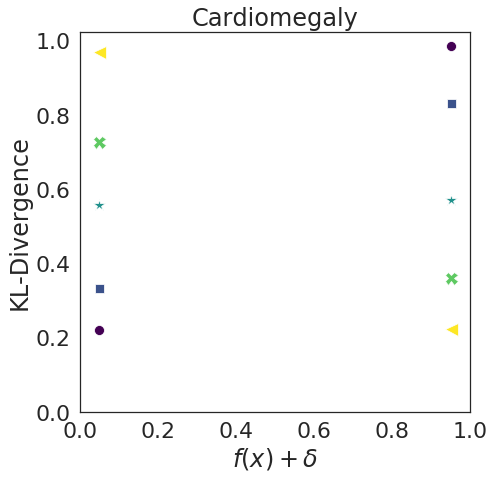

In [17]:
for iii in range(n):
    real_p = all_target_bins[iii] * 0.1
    real_p_ = (all_target_bins[iii]+1) * 0.1
    real_p = (real_p + real_p_)/2
    fake_q = all_target_pred[iii]
    #newcmp = ListedColormap(newcolors)
    import seaborn as sns
    sns.set(style="white")
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2})
    fig = plt.figure(figsize = (7,7))
    x = np.arange(0.0, 1.0, step=0.1)
    for i in range(0,n_bins,2):
        index = np.where(all_source_bins[iii] == i)
        target_pred_i = fake_q[index]
        source_pred_i = real_p[index]
        index = np.where(all_source_bins[iii] == i+1)
        target_pred_i = np.append(target_pred_i, fake_q[index],axis=0)
        source_pred_i = np.append(source_pred_i,real_p[index],axis=0)
        target_pred_i = np.reshape(target_pred_i,[-1,n_bins])
        source_pred_i = np.reshape(source_pred_i,[-1,n_bins])
        kl = []
        for k in range(n_bins):
            p = source_pred_i[:,k]
            q = target_pred_i[:,k]
            temp = p * np.log(q) + (1-p)*np.log(1-q)
            temp = np.mean(temp) * -1
            kl.append(temp)
        
        mean_t = np.mean(target_pred_i,0)
        sd_t = np.std(target_pred_i,0)           
        mean_s = np.mean(source_pred_i,0)
        sd_s = np.std(source_pred_i,0)
        x_axis = np.arange(0.0, 1.0, step=0.1)
        #ax = sns.lineplot(mean_s, mean_t, markers=True, dashes=True)
        ax = sns.lineplot(mean_s,kl,label=names[i],c=newcolors[int(i/2)],\
                              alpha=1,marker=markers[i], markersize=makrker_size[i])
    plt.xticks(np.arange(0, 1.1, step=0.2))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    ax.get_legend().remove()
    #plt.legend(loc=2)
    plt.xlabel( r'$f(x)+\delta$' )
    plt.ylabel('KL-Divergence')
    plt.title(titles[iii])
    #fig.colorbar(im, ax=axs)
    plt.show()
    #fig.savefig(result_dir + "/"+attribute[iii]+ "_qualitative_no_ledgend_kl.png",\
    #                bbox_inches='tight')

# Save as gif

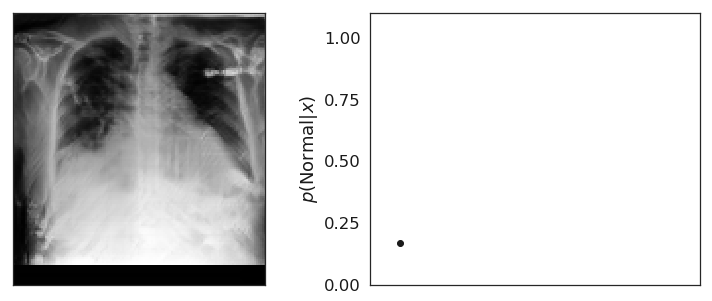

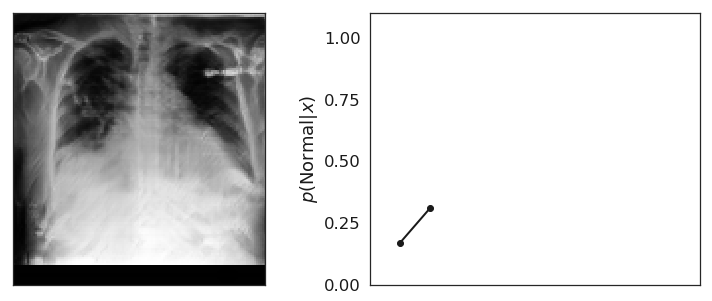

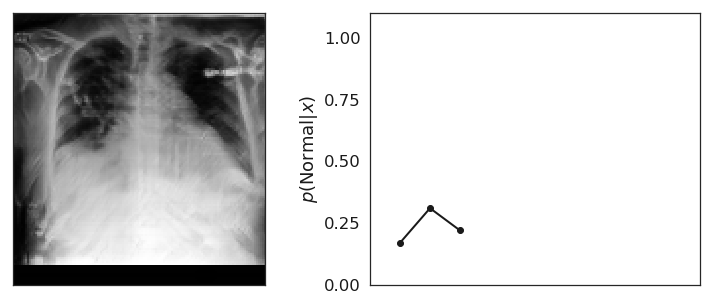

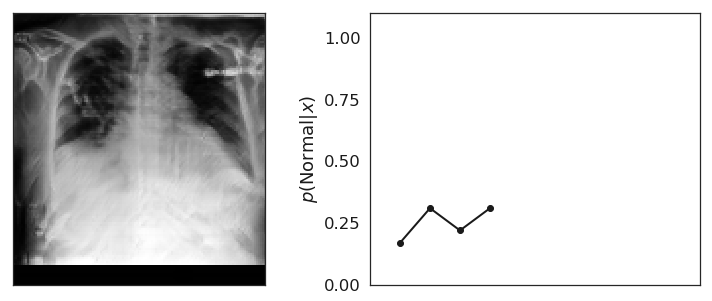

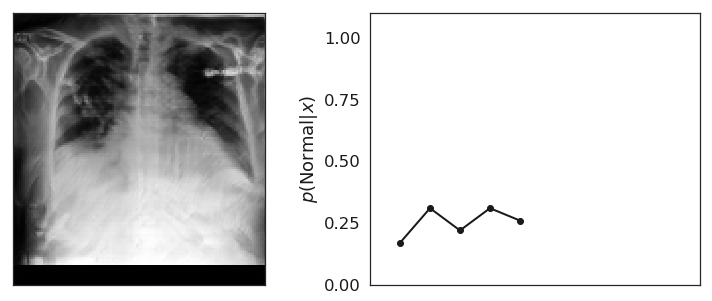

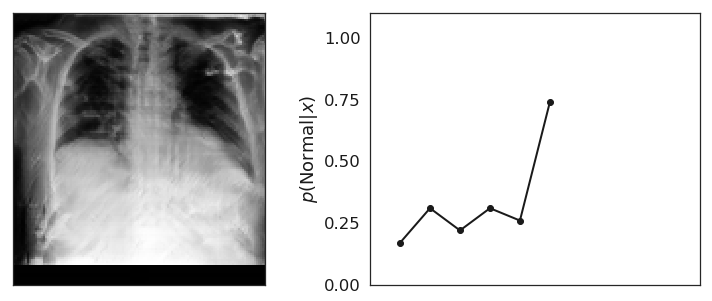

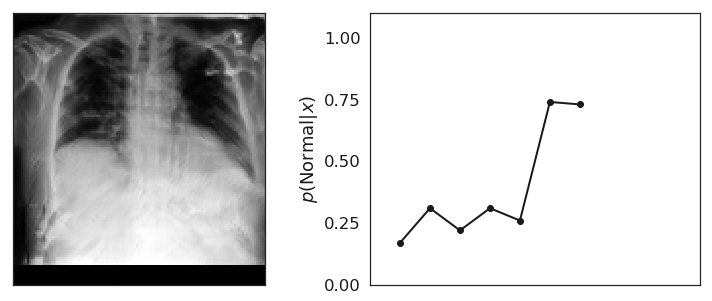

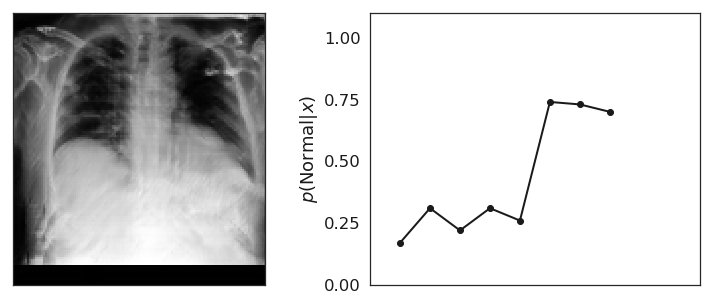

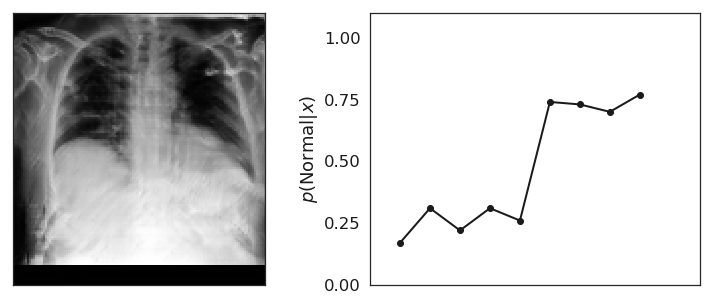

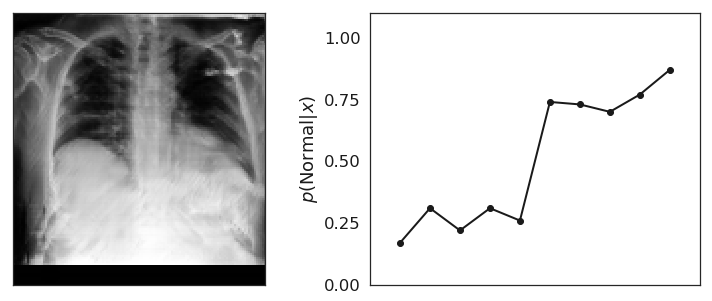

In [21]:
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
samples = [47]
i =0
temp_dir = os.path.join(main_dir, gan_exp[i], 'tmp')
try:
    os.makedirs(temp_dir)
    os.makedirs(os.path.join(temp_dir,'img_original'))
    os.makedirs(os.path.join(temp_dir,'gif'))
    os.makedirs(os.path.join(temp_dir,'img'))                
except:
    pass


fig = plt.figure()
for index in samples:
    #plt.subplot(10,11,counter)
    plt.imshow(a_input_img[i][index],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    cu_pre = str(np.round(input_pred[i][index][main_index[i]],decimals=2))
    plt.title('$f(x)$=' + cu_pre)
    #plt.title("Original")
    #plt.show()
    fig.savefig(temp_dir + "/img_original/example_"+attribute[i]+ "_index_" + str(index)+".png",\
                    bbox_inches='tight')
    plt.close()


    for j in range(9,-1,-1):
        fig, (ax, ax3) = plt.subplots(1,2, sharey=False,figsize=(13,5))
        img = np.ones([dim+10, dim]) * 0
        img[0:dim,:] = a_fake_img[i][index][j]
        img = np.interp(img, [-1,1], [0,255])
        if float(cu_pre) > 0.5:
            temp = plt.imread('/pghbio/dbmi/batmanlab/singla/MICCAI_2019/GAN_Interpretability/src/CelebA/Notebook_Quantitative_Results/tmp/'+str(j)+' - Copy.png')
        else:
            temp = plt.imread('/pghbio/dbmi/batmanlab/singla/MICCAI_2019/GAN_Interpretability/src/CelebA/Notebook_Quantitative_Results/tmp/'+str(j)+'.png')
        temp = cv2.resize(temp,(dim,10))
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        img[dim:,:] = temp
        img = img.astype(np.uint8)
        ax.imshow(img, cmap='gray') 
        ax.set_xticks([])
        ax.set_yticks([])

        ax3.set_ylabel(r'$p($Normal$ | x)$')
        ax3.set_ylim([0.0,1.1])    
        ax3.set_xlim([0,1.1])
        x = []
        y = []
        for k in range(9,j-1,-1):
            value = np.round(fake_pred[i][index][k][main_index[i]],decimals=2)
            x.append(1-k*0.1)
            y.append(1-value)
        ax3.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax3.plot(x,y,  color='k',marker='o')
        ax3.tick_params(axis='y', colors='k')
        ax3.yaxis.label.set_color('k')              
        ax3.set_xticks([])

        #plt.show()
        fig.savefig(temp_dir+"/img/example_"+attribute[i]+ "_" +str(j)+ "_index_" \
                    + str(index)+".png",bbox_inches='tight')
        #plt.close()
        #break
    with imageio.get_writer(temp_dir+'/gif/'+attribute[i]+'_'+cu_pre+'_'+str(index)+'.gif', mode='I') as writer:
        if float(cu_pre) > 0.5:
            for ii in range(9,-1,-1):
                filename = temp_dir+'/img/example_'+attribute[i]+'_'+str(ii)+'_index_'+str(index)+'.png'
                image = imageio.imread(filename)
                writer.append_data(image)
                writer.append_data(image)
                writer.append_data(image)
                writer.append_data(image)
                writer.append_data(image)
                writer.append_data(image)
        else:
            for ii in range(0,10):
                filename = temp_dir+'/img/example_'+attribute[i]+'_'+str(ii)+'_index_'+str(index)+'.png'
                image = imageio.imread(filename)
                writer.append_data(image)
                writer.append_data(image)
                writer.append_data(image)

In [22]:
temp_dir

'/pghbio/dbmi/batmanlab/singla/Explanation_XRay/output/classifier/StanfordCheXpert_128_ICLR/explainer/Cardiomegaly_ICLR/test/tmp'